<p style="text-align:center; font-size: 28px;">CS-C4100 - Digital Health and Human Behavior (2024)</p>

In [286]:
ID = "102565223"  # Your Student Id

<div class="alert alert-info">

<details open>
    <summary style="font-size: 22px"><b>⚠️ General Tips</b></summary>

* Please review [the general course info](https://mycourses.aalto.fi/course/view.php?id=44883) carefully.
* Feel free to create new code cells. This is a good way to write extra tests you may want to run. Note that all cells are executed during evaluation. 
* **Never** create new cells by menu commands "Edit/Copy Cells" and "Edit/Paste Cells ...". These commands create cells with duplicate ids and make autograding impossible. Use menu commands "Insert/Insert Cell ..." or the button with a plus sign to insert new cells.
* When you write code required to solve an assignment, we highly recommend you to insert the code where it says `# YOUR CODE HERE`.
* If your notebook is broken (e.g. accidentally removed a hidden tests cell, etc.), you can always re-fetch the assignment. To do so, rename the existing folder and fetch the assignment again.
* Do not forget to "Submit" your solution in the "Nbgrader→Assignment List" page after finishing your work. 
* To better understand how doing assignments in JupyterLab works, please refer to the [documentation](https://scicomp.aalto.fi/aalto/jupyterhub/nbgrader-jupyterlab/).

</details>
</div>

---


# Assignment 1.2: StudentLife Dataset <a class="anchor" id="introduction"></a>

In this assignment, we will delve into the StudentLife dataset, a rich collection of data capturing various aspects of student life (such as activity, conversational engagement, and academic performance, captured through smartphone sensing and questionnaire data) at Dartmouth College. The study aimed to determine how student behavior (e.g., physical activity and social interaction) correlates with academic performance and mental well-being. This exercise aims to explore correlations between different student behaviors and academic performance. The exercise follows the data analysis workflow introduced in the first programming assignment. 

Our goal is to replicate a few specific findings from the StudentLife paper [[1]](#references):
1. Conversation duration during the daytime is correlated with student academic performance.
2. Activity duration is negatively correlated with student academic performance.

<div class="alert alert-info">

### 📚 Learning outcomes
Upon completing this assignment, you will be able to: 

1. Preprocess, transform, and merge data for analysis.
2. Visualize data to gain insights.
3. Perform basic regression analysis.
4. Interpret the analysis results in the context of the StudentLife study.
    
</div>

### Table of Contents

* [Introduction](#introduction)
* [Section 1: Loading the Data](#section_1)
    * [Section 1.1: Grades Data](#section_1_1)
    * [Section 1.2: Activity Duration Data](#section_1_2)
    * [Section 1.3: Conversation Duration Data](#section_1_3)
* [Section 2: Preprocessing the Data](#section_2)
    * [Section 2.1: Preprocessing grades data](#section_2_1)
    * [Section 2.2: Preprocessing activity data](#section_2_2)
    * [Section 2.3: Preprocessing conversation data](#section_2_3)
* [Section 3: Exploration](#section_3)
    * [Section 3.1: Grades data exploration](#section_3_1)
    * [Section 3.2: Activity data exploration](#section_3_2)
    * [Section 3.3: Conversation data exploration](#section_3_3)
* [Section 4: Analysis](#section_4)
    * [Section 4.1: Merge dataframes](#section_4_1)        
    * [Section 4.2: Visualize data](#section_4_2)
        * [Section 4.2.1: GPA and Activity Duration](#section_4_2_1)
        * [Section 4.2.2: GPA and Conversation Duration](#section_4_2_2)
    * [Section 4.3: Regression Analysis](#section_4_3)
        * [Section 4.3.1: GPA vs Activity Duration](#section_4_3_1)
        * [Section 4.3.2: GPA vs Conversation Duration](#section_4_3_2)
* [Section 5: Interpretation](#section_5)
* [References](#references)
* [Extra Reading](#extra)

---

<a class="anchor" id="section_1"></a>
## Section 1: Loading the Data

In this section, we'll start by importing the Python modules required in this exercise and then import selected and prepared features from the StudentLife dataset. 

In [329]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Define data path
if 'AALTO_JUPYTERHUB' in os.environ:
    # Using jupyter sharedata directory
    DATA = '/coursedata/pa1/'
else:
    DATA = '../../data/pa1/'

Then, we load data in three separate CSV files: 
1. Grades Data: Contains information about students' academic performance.
2. Conversation Duration Data: Captures the duration of conversations that students have had.
3. Activity Duration Data: Contains information about different physical activities that students engage in.

<a class="anchor" id="section_1_1"></a>
### Section 1.1: Grades Data

First, we'll load the grades data and have a peek:

In [330]:
# Load GPA data
grades_df = pd.read_csv(os.path.join(DATA, "grades.csv"))
print("Grades data loaded!")
grades_df.head()

Grades data loaded!


,uid,gpa all,gpa 13s,cs 65
0,u01,2.863,1.777778,3.0
1,u02,3.505,4.000000,4.0
2,u04,3.029,3.500000,4.0
3,u05,3.679,3.777778,4.0
4,u07,3.474,4.000000,4.0


The dataframe has four columns:
- **uid** : user id
- **gpa all** : overall grade point average (gpa)
- **gpa 13s** : spring term 2013 gpa
- **cs 65** : a specific course-related info

<a class="anchor" id="section_1_2"></a>
### Section 1.2: Activity Duration Data

Next, we'll load the activity duration data.

In [331]:
# Load activity data
activity_df = pd.read_csv(os.path.join(DATA, "hourly_activity.csv"), index_col=0)

# Print dataframe head
activity_df.head()

,2013-03-27 00:00:00-04:00,2013-03-27 01:00:00-04:00,2013-03-27 02:00:00-04:00,2013-03-27 03:00:00-04:00,2013-03-27 04:00:00-04:00,2013-03-27 05:00:00-04:00,2013-03-27 06:00:00-04:00,2013-03-27 07:00:00-04:00,2013-03-27 08:00:00-04:00,2013-03-27 09:00:00-04:00,...,2013-05-31 14:00:00-04:00,2013-05-31 15:00:00-04:00,2013-05-31 16:00:00-04:00,2013-05-31 17:00:00-04:00,2013-05-31 18:00:00-04:00,2013-05-31 19:00:00-04:00,2013-05-31 20:00:00-04:00,2013-05-31 21:00:00-04:00,2013-05-31 22:00:00-04:00,2013-05-31 23:00:00-04:00
id,,,,,,,,,,,,,,,,,,,,,
u00,0.000000,0.0,0.020173,0.0,0.0,0.0,0.000000,0.304478,0.153614,0.292835,...,0.574018,0.487261,0.611801,0.347826,0.350168,0.018576,0.263158,0.214286,NaN,NaN
u01,0.002941,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.160121,0.131737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
u02,0.024096,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.169096,...,0.185185,0.243323,0.000000,0.374593,0.256173,0.180147,0.000000,0.000000,0.0,0.044
u03,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.014620,0.000000,0.139881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
u04,0.000000,0.0,0.000000,0.0,0.0,0.0,0.061947,0.105422,0.000000,0.227545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As shown above, the index column contains student IDs, and other columns indicate activity *proportion* in one-hour bins (0 means no activity, 1 means that the student has been active for the whole hour). The data covers the spring semester of 2013.

<a class="anchor" id="section_1_3"></a>
### Section 1.3: Conversation Duration Data

And finally, the conversation duration data:

In [332]:
# Load the conversation data
conversation_df = pd.read_csv(os.path.join(DATA, "conversation_durations.csv"), index_col=0)
print("Conversation data loaded!")

# Print dataframe head
conversation_df.head()

Conversation data loaded!


,timestamp,id,duration
0,2013-03-27 00:00:00-04:00,u00,3.533333
1,2013-03-27 01:00:00-04:00,u00,NaN
2,2013-03-27 02:00:00-04:00,u00,NaN
3,2013-03-27 03:00:00-04:00,u00,NaN
4,2013-03-27 04:00:00-04:00,u00,NaN


The dataframe has three columns:
- **timestamp** : hourly timestamps covering spring term 2013
- **id** : student id
- **duration** : mobile phone inferred conversation duration during the hour (0-60 min).

We notice that the dataframes are of different formats. Thus, some transformations are needed to merge them. We'll do that in the next section.

---

<a class="anchor" id="section_2"></a>
## Section 2: Preprocessing the Data

Data preprocessing is a crucial step in any data science or machine-learning workflow. In this section, we will clean the data, and select and transform certain features to prepare our data for the subsequent steps. We proceed with a dataframe at a time, starting with the grades.

<a class="anchor" id="section_2_1"></a>
### Section 2.1: Preprocessing grades data

We'll start by checking the data with `describe()`:

In [333]:
grades_df.describe()

,gpa all,gpa 13s,cs 65
count,30.000000,30.000000,30.000000
mean,3.421533,3.330556,3.622222
std,0.397754,0.798284,0.796224
min,2.400000,1.000000,0.000000
25%,3.257000,3.333333,3.666667
50%,3.490500,3.527778,4.000000
75%,3.698500,3.861111,4.000000
max,3.947000,4.000000,4.000000


We notice that there are no apparent outliers in the data. Then we'll check if there are any missing values with chaining `isna()`and `sum()`: 

In [334]:
grades_df.isna().sum()

uid         0
 gpa all    0
 gpa 13s    0
 cs 65      0
dtype: int64

There are no missing values. Instead, we noted that the columns column names contain some unwanted empty spaces. Let's print the column names using `columns`: 

In [335]:
list(grades_df.columns)

['uid', ' gpa all', ' gpa 13s', ' cs 65']

In this exercise, we are only interested in spring term GPA, so we'll select only that column and student id's. 

<div class="alert alert-warning">

#### 📝 Task 1

- Select only columns named "uid" and " gpa 13s", discarding the rest. Notice the empty spaces in strings.
- For the convenience, rename those columns "id" and "gpa".


</div>

In [336]:
# Select only required columns and rename them for the grades data

# YOUR CODE HERE
grades_df.rename(columns={'uid': 'id', ' gpa 13s' : 'gpa'}, inplace=True)
columns = ['id', 'gpa']
#raise NotImplementedError()
grades_df = grades_df.drop([' cs 65', ' gpa all'], axis =1)
print("Grades data after preprocessing:")
grades_df.head()

Grades data after preprocessing:


,id,gpa
0,u01,1.777778
1,u02,4.000000
2,u04,3.500000
3,u05,3.777778
4,u07,4.000000


In [337]:
### Sanity Checks. Do not modify.

assert len(grades_df.columns) == 2, "Too many columns"

In [338]:
### Hidden Tests

<a class="anchor" id="section_2_2"></a>
### Section 2.2: Preprocessing activity data

Next, we'll inspect activity data. The data is organized so that each column represents a date and hour, and each row is a subject. We'll start by inspecting the data and checking missing values:


In [339]:
activity_df.describe()

,2013-03-27 00:00:00-04:00,2013-03-27 01:00:00-04:00,2013-03-27 02:00:00-04:00,2013-03-27 03:00:00-04:00,2013-03-27 04:00:00-04:00,2013-03-27 05:00:00-04:00,2013-03-27 06:00:00-04:00,2013-03-27 07:00:00-04:00,2013-03-27 08:00:00-04:00,2013-03-27 09:00:00-04:00,...,2013-05-31 14:00:00-04:00,2013-05-31 15:00:00-04:00,2013-05-31 16:00:00-04:00,2013-05-31 17:00:00-04:00,2013-05-31 18:00:00-04:00,2013-05-31 19:00:00-04:00,2013-05-31 20:00:00-04:00,2013-05-31 21:00:00-04:00,2013-05-31 22:00:00-04:00,2013-05-31 23:00:00-04:00
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,20.000000,20.000000,19.000000,17.000000,17.000000,17.000000,17.000000,18.000000,17.000000,17.000000
mean,0.015598,0.002914,0.005982,0.000160,0.000321,0.000241,0.002136,0.026822,0.080031,0.134705,...,0.177567,0.219467,0.235360,0.246162,0.192385,0.142220,0.158920,0.144353,0.102456,0.048155
std,0.052439,0.011319,0.028580,0.000864,0.001727,0.001299,0.011503,0.082057,0.127487,0.114919,...,0.304583,0.302078,0.294902,0.267952,0.307503,0.237510,0.209353,0.171112,0.176240,0.109214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.044379,0.000000,0.008772,0.000000,0.006618,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115385,...,0.000000,0.108205,0.160121,0.169184,0.056911,0.055718,0.031884,0.068324,0.000000,0.004451
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160121,0.218563,...,0.196956,0.289475,0.342031,0.357860,0.229261,0.149733,0.263158,0.202006,0.178248,0.030395
max,0.251462,0.053731,0.153302,0.004651,0.009302,0.006993,0.061947,0.323899,0.458034,0.362500,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.944023,0.652174,0.573171,0.527950,0.427653


In [340]:
activity_df.isna().sum()

2013-03-27 00:00:00-04:00    20
2013-03-27 01:00:00-04:00    20
2013-03-27 02:00:00-04:00    20
2013-03-27 03:00:00-04:00    20
2013-03-27 04:00:00-04:00    20
                             ..
2013-05-31 19:00:00-04:00    32
2013-05-31 20:00:00-04:00    32
2013-05-31 21:00:00-04:00    31
2013-05-31 22:00:00-04:00    32
2013-05-31 23:00:00-04:00    32
Length: 1584, dtype: int64

We notice that there are no apparent outliers in the data, and columns have some missing values.

<div class="alert alert-warning">

#### 📝 Task 2

- Fill NaN's in `activity_df` with zero. We will use this dataframe for visualizations later.
- Create a new dataframe named `avg_activity_df`. We are going to use it to store the average activity for each student (`id`).
   - The dataframe should contain two columns:
       - **id** : with unique student id's
       - **duration** : average activity duration for each student (`id`)
</div>

In [341]:
# YOUR CODE HERE
#raise NotImplementedError()
activity_df.fillna(0, inplace=True)
avg_activity_df = pd.DataFrame()
avg_activity_df['id'] = activity_df.index
mean_values=activity_df.mean(axis=1)
avg_activity_df['duration']=mean_values.values 

print("Average hourly activity for each user:")
avg_activity_df.head()
#activity_df.head(5)
#activity_df.mean(axis=1)

Average hourly activity for each user:


,id,duration
0,u00,0.117676
1,u01,0.072225
2,u02,0.081922
3,u03,0.012604
4,u04,0.122009


In [342]:
### Sanity Checks. Do not modify.

assert activity_df.isna().sum().sum() == 0, "There are still some NaN values left!"
assert avg_activity_df.shape == (49, 2), "Wrong shape (number of rows/columns)"

In [343]:
### Hidden tests

<a class="anchor" id="section_2_3"></a>

### Section 2.3: Preprocessing conversation data

Again, we'll start by inspecting the data and checking missing values:


In [344]:
conversation_df.describe()

,duration
count,32263.000000
mean,25.013088
std,18.770282
min,0.016667
25%,7.716667
50%,21.366667
75%,41.283333
max,60.000000


In [345]:
conversation_df.isna().sum()

timestamp        0
id               0
duration     45451
dtype: int64

It appears that there are some missing values in the data. This time, those missing values are interpreted so that the subject is not engaged in conversation during the hour indicated by the index time stamp. Therefore, we do not remove these values but replace those with 0 (integer).

<div class="alert alert-warning">

#### 📝 Task 3

Replace all NaN values on the "duration" column with 0.

</div>

<div class="alert alert-success">

<details>
    <summary style="font-size: 18px">💡 Hint</summary>

You can use [`pandas.DataFrame.fillna`](https://pandas.pydata.org/docs/reference>/api/pandas.DataFrame.fillna.html).

</details>
</div>

In [346]:
# Fill missing durations with 0

# YOUR CODE HERE
#raise NotImplementedError()
conversation_df.fillna(0, inplace=True)


In [347]:
### Hidden tests

Next, let's set the "timestamp" column as a dataframe index and convert it into datetime-format.

<div class="alert alert-warning">

#### 📝 Task 4

- Set column `timestamp` as index.
- Convert index into datetime format.

</div>

<div class="alert alert-success">

<details>
    <summary style="font-size: 18px">💡 Hint</summary>

- Use [`pandas.DataFrame.set_index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html)
- Use [`pandas.to_datetime`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

</details>
</div>

In [348]:
# YOUR CODE HERE
#raise NotImplementedError()
conversation_df['timestamp'] = pd.to_datetime(conversation_df['timestamp'])
conversation_df.set_index(['timestamp'], inplace=True)


In [349]:
### Hidden tests

In [350]:
conversation_df.head()

,id,duration
timestamp,,
2013-03-27 00:00:00-04:00,u00,3.533333
2013-03-27 01:00:00-04:00,u00,0.000000
2013-03-27 02:00:00-04:00,u00,0.000000
2013-03-27 03:00:00-04:00,u00,0.000000
2013-03-27 04:00:00-04:00,u00,0.000000


Next, we want to focus only on the conversation during morning hours, i.e. 9 AM to 12 PM (four timestamped hours). We do that with the following function that you need to complete.

<div class="alert alert-warning">

#### 📝 Task 5

- Start by examining the docstrings in the function below.
- From the original `conversation_df` dataframe, only select rows having timestamped hours `start_hour` and `end_hour`, given as function arguments (integers from 0 to 23).
- You can extract hour from [Pandas DatetimeIndex](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html) by `.hour` attribute (e.g., df.index.hour)
- Use the selected rows to create a new dataframe called `avg_conversation_df` (the function should return this)

</div>

<div class="alert alert-success">

<details>
    <summary style="font-size: 18px">💡 Hint</summary>

While there are multiple ways of filtering the dataframe, you could try, for example [pandas.DataFrame.query](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) or [pandas.DataFrame.mask](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html).

</details>
</div>

In [351]:
def filter_average_duration(df, start_hour, end_hour):
    """
    Calculate the average duration of events for each 'id', filtering by a specific time range.
    
    Parameters:
    - df (pandas.DataFrame): The DataFrame containing event data. 
                             It should have a datetime index and columns 'id' and 'duration'.
    - start_hour (int): The starting hour for the time range filter (24-hour format).
    - end_hour (int): The ending hour for the time range filter (24-hour format).
    
    Returns:
    pandas.DataFrame: A DataFrame containing each 'id' and its corresponding average 'duration'
                      for events that occur between 'start_hour' and 'end_hour'.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    
    filtered = df[(df.index.hour >= start_hour) & (df.index.hour <= end_hour)]
    print(filtered.head(10))
    #filtered = df.query('timestamp.hour >= start_hour & timestamp.hour <= end_hour')
    avg_conversation_df = filtered.groupby('id')['duration'].mean().reset_index()
    
    return avg_conversation_df

In [352]:
# Calculate the average conversation duration during daytime for each subject
morning_avg_conversation_df = filter_average_duration(conversation_df, 9, 12)

print("Average conversation duration for each subject:")
morning_avg_conversation_df.head()
data = {
    'timestamp': ['2023-01-01 09:00:00', '2023-01-01 09:30:00', '2023-01-01 10:00:00', '2023-01-01 11:00:00'],
    'id': ['u00', 'u00', 'u01', 'u01'],
    'duration': [10, 20, 30, 40]
}

                            id   duration
timestamp                                
2013-03-27 09:00:00-04:00  u00   2.350000
2013-03-27 10:00:00-04:00  u00  57.316667
2013-03-27 11:00:00-04:00  u00  34.616667
2013-03-27 12:00:00-04:00  u00   0.000000
2013-03-28 09:00:00-04:00  u00   0.000000
2013-03-28 10:00:00-04:00  u00   0.000000
2013-03-28 11:00:00-04:00  u00   1.333333
2013-03-28 12:00:00-04:00  u00  60.000000
2013-03-29 09:00:00-04:00  u00   0.000000
2013-03-29 10:00:00-04:00  u00  57.183333
Average conversation duration for each subject:


In [353]:
### Sanity Checks. Do not modify.

data = {
    'timestamp': ['2023-01-01 09:00:00', '2023-01-01 09:30:00', '2023-01-01 10:00:00', '2023-01-01 11:00:00'],
    'id': ['u00', 'u00', 'u01', 'u01'],
    'duration': [10, 20, 30, 40]
}
mock_df = pd.DataFrame(data)
mock_df['timestamp'] = pd.to_datetime(mock_df['timestamp'])
mock_df.set_index('timestamp', inplace=True)

assert filter_average_duration(mock_df, 9, 12).equals(pd.DataFrame({
    'id': ['u00', 'u01'],
    'duration': [15.0, 35.0]
})), "Wrong answer!"

                      id  duration
timestamp                         
2023-01-01 09:00:00  u00        10
2023-01-01 09:30:00  u00        20
2023-01-01 10:00:00  u01        30
2023-01-01 11:00:00  u01        40


In [354]:
### Hidden tests

---

<a class="anchor" id="section_3"></a>

## Section 3: Exploration

Data exploration and visualization offer invaluable insights into the dataset's structure, quirks, and patterns. This section, we visualize data and hourly distributions for activity and conversation durations. 

<a class="anchor" id="section_3_1"></a>
### Section 3.1: Grades data exploration

Let's start by inspecting the grades.

<Figure size 1200x600 with 0 Axes>

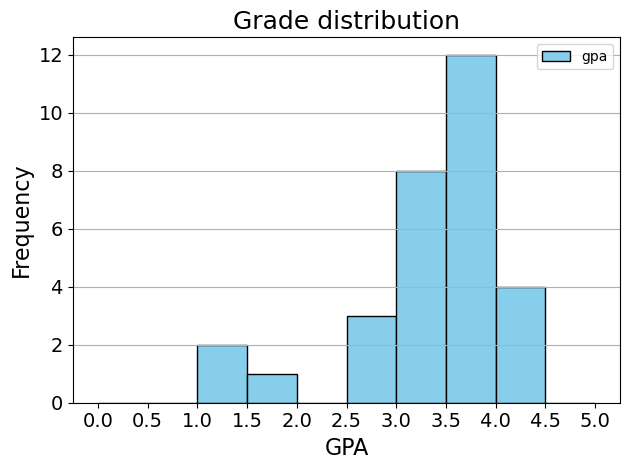

In [355]:
# Define bins for the grades
bins = np.linspace(0, 5, 11)  # = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Plot
plt.figure(figsize=(12, 6))
grades_df.plot(kind='hist', bins=bins, edgecolor="k", color='skyblue')
plt.title('Grade distribution', fontsize=18)
plt.xlabel('GPA', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(bins, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

We notice that while the GPA is generally quite good, there are few students with low scores.

<a class="anchor" id="section_3_2"></a>

### Section 3.2: Activity data exploration

Next, we'll visualize students' average activity distribution.

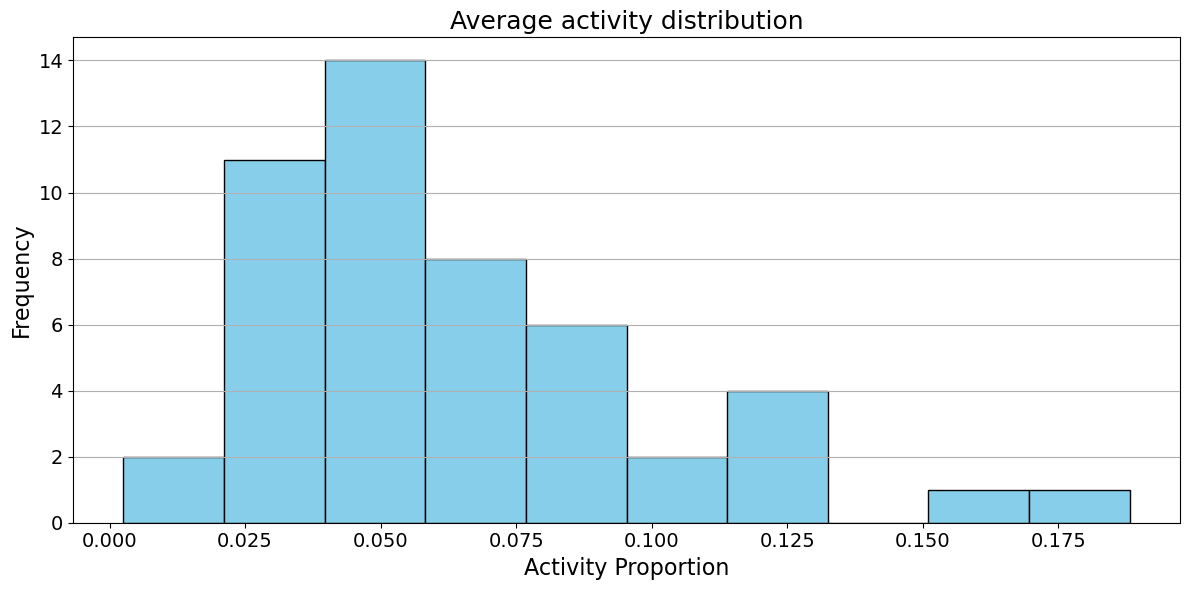

In [356]:
# Plot
plt.figure(figsize=(12, 6))
avg_activity_df['duration'].plot(kind="hist", edgecolor="k", color="skyblue")
plt.title("Average activity distribution", fontsize=18)
plt.xlabel("Activity Proportion", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

We observe that the activity distribution is slightly right-skewed.
Next, we'll transform activity data, calculate hourly sums, and visualize the hourly activity.

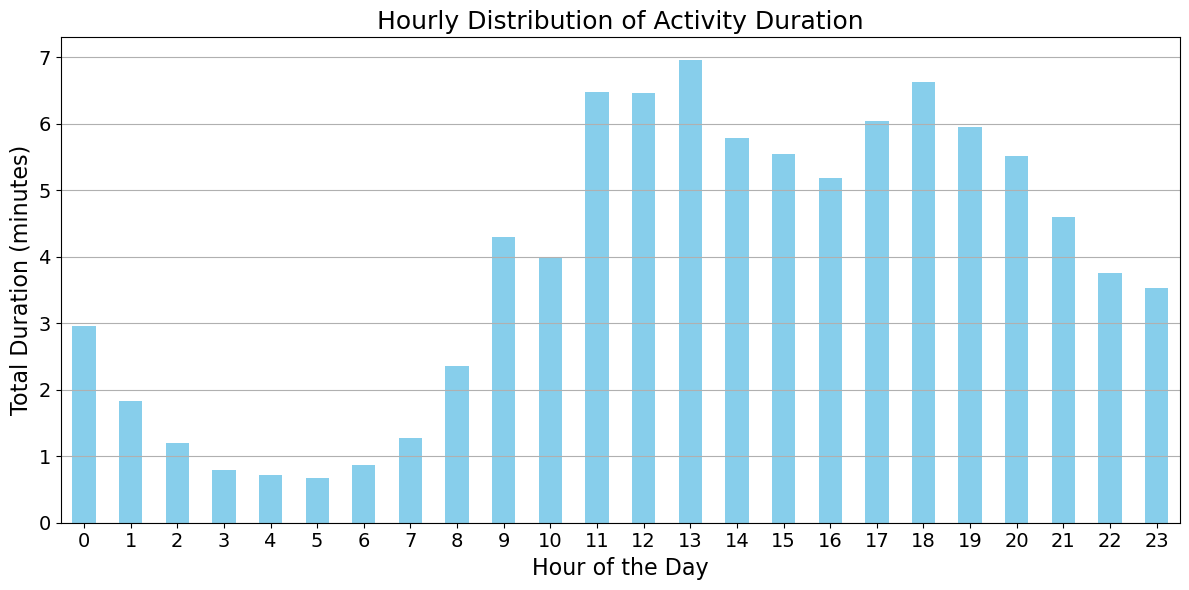

In [357]:
# Start by transposing the dataframe
activity_df = activity_df.T

# Convert the index to DateTime object
activity_df.index = pd.to_datetime(activity_df.index)

# Extract the hour and create a new column
activity_df['hour'] = activity_df.index.hour

# Group by the 'hour' column and calculate the average minutes per group
activity_hourly_distribution = activity_df.groupby('hour').mean().mean(axis=1) * 60

# Plot
plt.figure(figsize=(12, 6))
activity_hourly_distribution.plot(kind='bar', color='skyblue')
plt.title('Hourly Distribution of Activity Duration', fontsize=18)
plt.xlabel('Hour of the Day', fontsize=16)
plt.ylabel('Total Duration (minutes)', fontsize=16)
plt.xticks(rotation=0,fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Activity distribution looks reasonable, having two activity peaks during the day (around noon and 6 PM), and during the night, activity is at the lowest.

<a class="anchor" id="section_3_3"></a>

### Section 3.3: Conversation data exploration

Next, we'll visualize the conversation data.

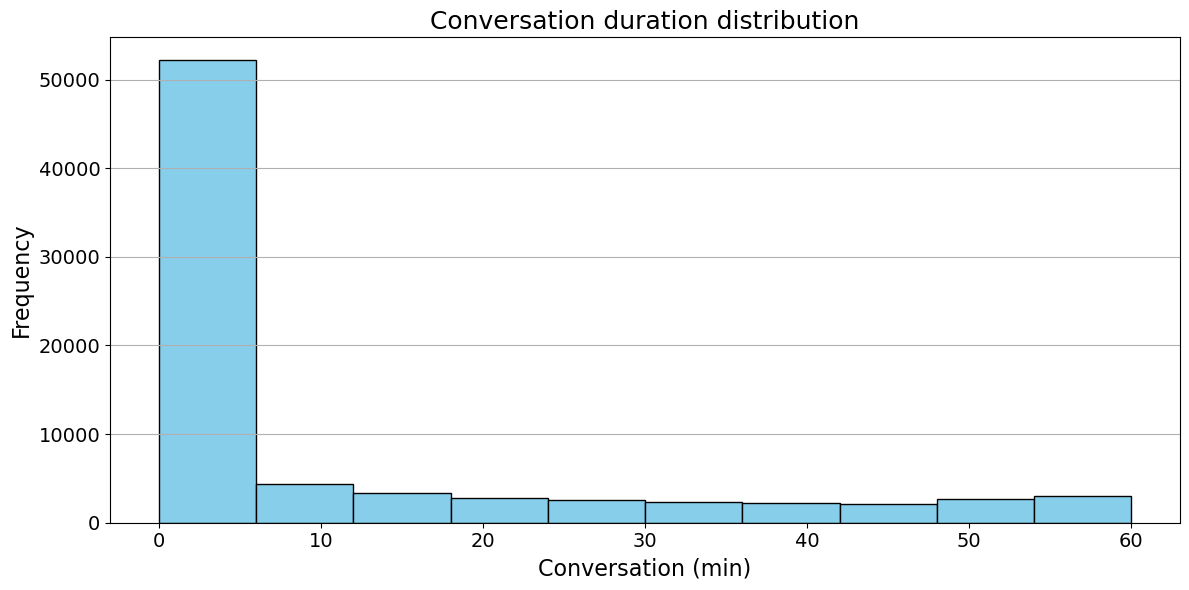

In [358]:
# Plot
plt.figure(figsize=(12, 6))
conversation_df["duration"].plot(kind="hist", bins=10, edgecolor="k", color="skyblue")
plt.title("Conversation duration distribution", fontsize=18)
plt.xlabel("Conversation (min)", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

The conversation duration distribution is highly skewed, and most values are low.

Additionally, we visualize the filtered conversation durations (during the morning hours).

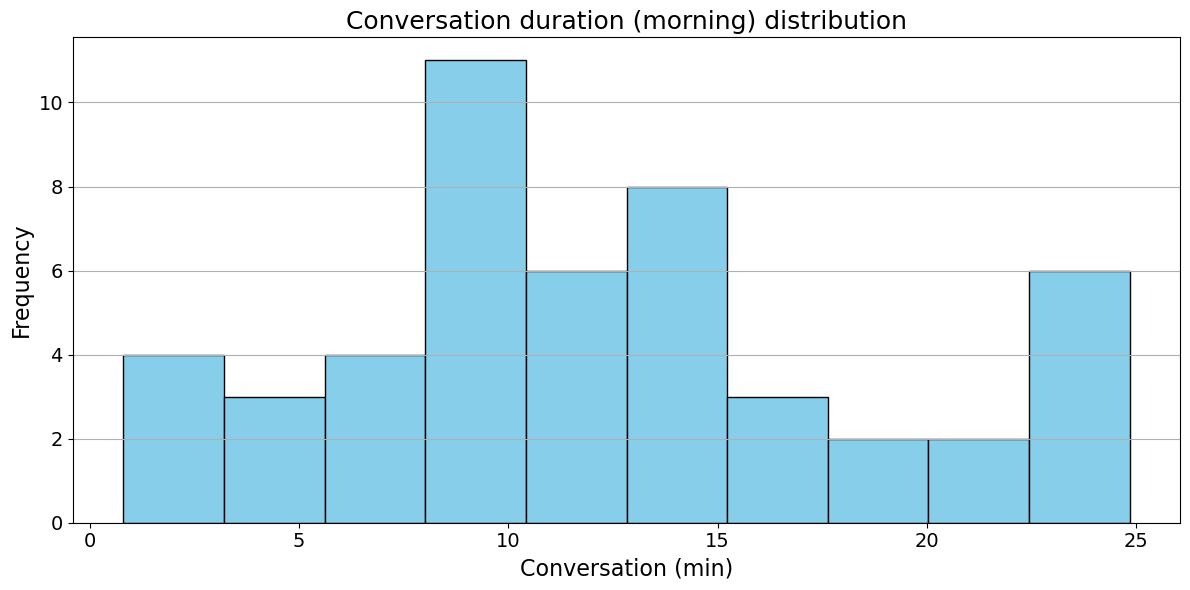

In [359]:
# Plot
plt.figure(figsize=(12, 6))
morning_avg_conversation_df['duration'].plot(kind='hist', bins=10, edgecolor="k", color='skyblue')
plt.title('Conversation duration (morning) distribution', fontsize=18)
plt.xlabel('Conversation (min)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In comparison with complete conversation data, the distribution here is not as skewed. 

Finally, we'll visualize conversation hourly distribution:

In [360]:
# Extract the hour from the timestamp
conversation_df['hour'] = conversation_df.index.hour

# Group by hour and average the durations
hourly_distribution = conversation_df.groupby('hour')['duration'].mean()

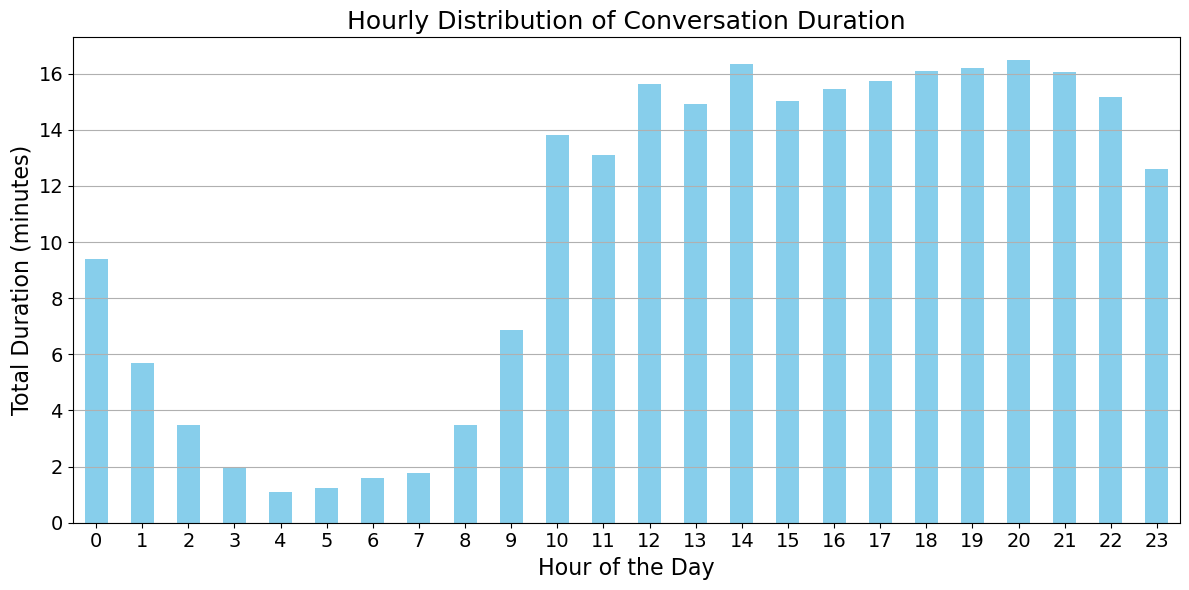

In [361]:
# Plot
plt.figure(figsize=(12, 6))
hourly_distribution.plot(kind='bar', color='skyblue')
plt.title('Hourly Distribution of Conversation Duration', fontsize=18)
plt.xlabel('Hour of the Day', fontsize=16)
plt.ylabel('Total Duration (minutes)', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Conversation duration distribution looks similar to activity distribution.

---

<a class="anchor" id="section_4"></a>

## Section 4: Analysis

This section aims to analyze the relationships between different data sets to draw meaningful conclusions. Specifically, we will:

1. **Merge Dataframes:** Combine different data sources for a unified view.
2. **Visualize Data:** Use graphs to understand trends and distributions.
3. **Regression Analysis:** Calculate correlations to interpret the relationships between variables.

<a class="anchor" id="section_4_1"></a>

### Section 4.1: Merge dataframes

First, we must merge the relevant dataframes to perform a comprehensive analysis by aligning them with their common 'id' fields.

First, join **the conversion duration dataframe** with **the grades dataframe.**

<div class="alert alert-warning">

#### 📝 Task 6

- merge dataframes "morning_avg_conversation_df" and "grades_df" using pandas [`pandas.DataFrame.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)
- merge on columns named "id" and use "inner" join

</div>

<div class="alert alert-success">

<details>
    <summary style="font-size: 18px">💡 Hint</summary>

Use parameters:
   - on = ... (or left_on = ..., and right_on = ... if the column names differ in the dataframes)
   - how = ...

</details>
</div>

In [362]:
# merged_conversation = ...

# YOUR CODE HERE
#raise NotImplementedError()
merged_conversation = pd.merge(morning_avg_conversation_df, grades_df, on= 'id', how='inner')

merged_conversation.head()

,id,duration,gpa
0,u01,13.368624,1.777778
1,u02,16.726136,4.000000
2,u04,24.844192,3.500000
3,u05,16.377904,3.777778
4,u07,8.444949,4.000000


Next, merge **the activity duration dataframe** with **the grades dataframe.**

<div class="alert alert-warning">

#### 📝 Task 7

- Merge dataframes "avg_activity_df" and "grades_df" using pandas [`pandas.DataFrame.merge()`].
- Use the same parameters as in the previous step.

</div>

In [363]:
# Assuming you have a dataframe 'grades_df' with 'id' and 'gpa all' columns
# merged_activity = ...

# YOUR CODE HERE
#raise NotImplementedError()
print(avg_activity_df.head(5), grades_df.head(5))
merged_activity = pd.merge(avg_activity_df, grades_df, on='id', how='inner')

merged_activity.head()

    id  duration
0  u00  0.117676
1  u01  0.072225
2  u02  0.081922
3  u03  0.012604
4  u04  0.122009     id       gpa
0  u01  1.777778
1  u02  4.000000
2  u04  3.500000
3  u05  3.777778
4  u07  4.000000


,id,duration,gpa
0,u01,0.072225,1.777778
1,u02,0.081922,4.000000
2,u04,0.122009,3.500000
3,u05,0.057836,3.777778
4,u07,0.056255,4.000000


Merging has given us two new dataframes, `merged_conversation`, and `merged_activity`, which we will use for further analysis.

<a class="anchor" id="section_4_2"></a>

### Section 4.2: Visualize data

<a class="anchor" id="section_4_2_1"></a>

#### 4.2.1. GPA and activity duration

Using a scatter plot, we can visualize the linear relationship between GPA and average activity duration.

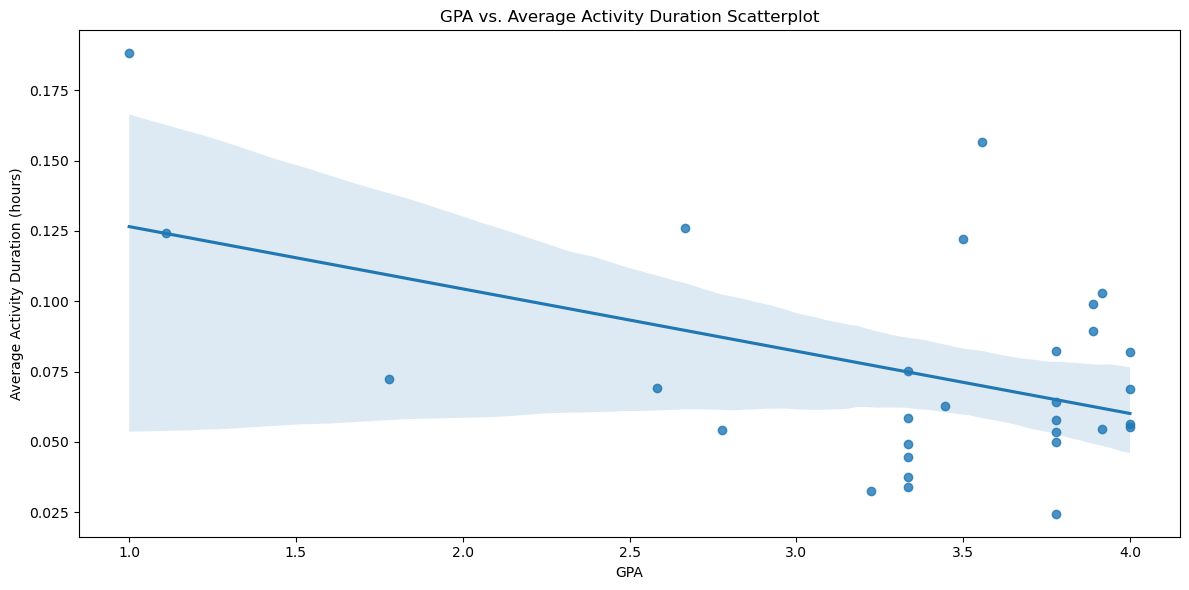

In [364]:
# Plot
plt.figure(figsize=(12, 6))
sns.regplot(data=merged_activity, x="gpa", y="duration")
plt.title("GPA vs. Average Activity Duration Scatterplot")
plt.xlabel("GPA")
plt.ylabel("Average Activity Duration (hours)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<a class="anchor" id="section_4_2_2"></a>

#### 4.2.2. GPA and conversation duration

Similarly, we can visualize the linear relationship between GPA and average conversation duration.

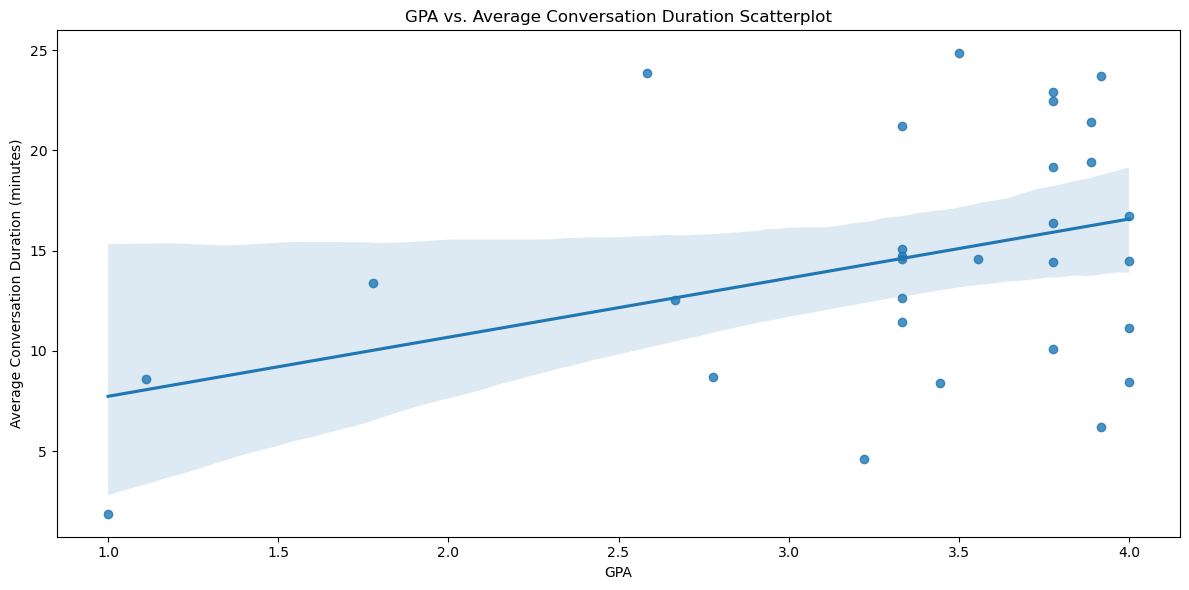

In [365]:
# Plot
plt.figure(figsize=(12, 6))
sns.regplot(data=merged_conversation, x="gpa", y="duration")
plt.title("GPA vs. Average Conversation Duration Scatterplot")
plt.xlabel("GPA")
plt.ylabel("Average Conversation Duration (minutes)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<a class="anchor" id="section_4_3"></a>

### Section 4.3: Regression Analysis

Regression analysis is a set of statistical processes used for modeling and analyzing the relationships between a dependent variable and one or more independent variables. By adjusting one independent variable, we can observe and analyze the corresponding changes in the dependent variable. In this exercise, we use `scipy.stats` library already imported as "stats". 

<a class="anchor" id="section_4_3_1"></a>

#### 4.3.1. GPA vs Activity Duration

To examine the correlation between GPA and average activity duration, we will use Pearson's correlation coefficient (for more information, take a look at the [last section](#extra)).

<div class="alert alert-warning">

#### 📝 Task 8

- Calculate Pearson's correlation coefficient and corresponding p-value between "duration" and "gpa" from `merged_activity` dataframe.
- Assign correlation coefficient to "correlation" and p-value to "p_value".

</div>

<div class="alert alert-success">

<details>
    <summary style="font-size: 18px">💡 Hint</summary>

Use [`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html).

</details>
</div>

In [369]:
# YOUR CODE HERE
#raise NotImplementedError()
from scipy.stats import pearsonr
correlation, p_value = pearsonr(merged_activity['duration'], merged_activity['gpa'])
print(f"Correlation: {correlation}, P-value: {p_value}")

Correlation: -0.4703087936974371, P-value: 0.008724253212447297


<a class="anchor" id="section_4_3_2"></a>

#### 4.3.2. GPA vs Conversation Duration

Similarly, we'll look at the correlation between GPA and conversation duration.

<div class="alert alert-warning">

#### 📝 Task 9

- Same as the previous task, calculate Pearson's correlation coefficient (and corresponding p-value) between "duration" and "gpa" from `merged_conversation` dataframe.
- Assign correlation coefficient to "correlation" and p-value to "p_value".

</div>

In [370]:
# YOUR CODE HERE
#raise NotImplementedError()
correlation, p_value = pearsonr(merged_conversation['duration'], merged_conversation['gpa'])

print(f"Correlation: {correlation}, P-value: {p_value}")

Correlation: 0.3859224674896365, P-value: 0.03517441397170433


---

<a class="anchor" id="section_5"></a>

## Section 5: Interpretation

Now, let's have a closer look at the results in the previous section and answer the following multiple-choice questions:

## Multiple Choice Questions

#### Question 1
**What does a negative correlation coefficient indicate about the relationship between two variables?**
- A: The variables are unrelated.
- B: The variables are negatively correlated.
- C: The correlation coefficient alone does not indicate the direction of the relationship.
- D: The variables are positively correlated.

---

#### Question 2
**What can be inferred from a p-value for the correlation between students' average activity and academic performance?**
- A: The p-value alone cannot determine the significance of the correlation.
- B: The correlation is weak.
- C: The correlation is not statistically significant.
- D: The correlation is statistically significant.

---

#### Question 3
**What does a correlation coefficient between students' average activity and academic performance suggest?**
- A: No correlation.
- B: A moderate negative correlation.
- C: A very strong negative correlation.
- D: A weak negative correlation.

---

#### Question 4
**What can be inferred about students' engagement in discussions during morning hours (9 a.m. to noon) and their academic performance?**
- A: They are positively correlated.
- B: They are unrelated.
- C: Cannot be determined.
- D: They are negatively correlated.

---

#### Question 5
**What does a p-value of for the correlation between students' morning discussions and academic performance indicate?**
- A: The correlation is very strong.
- B: The p-value alone cannot determine the significance of the correlation.
- C: The correlation is statistically significant.
- D: The correlation is not statistically significant.

---

<div class="alert alert-warning">

#### 📝 Task 10

- Answer the question by adding the right choices ("A", "B", ''C", or "D") in the following code cell after question names.
- Please do not change the question names!


</div>

In [371]:
# Your answer here. For example, if you choose option A for question 1, write: answer_1 = 'A'
answer_1 = "B"
answer_2 = "D"
answer_3 = "B"
answer_4 = "A"
answer_5 = "C"

In [276]:
### Hidden tests


In [277]:
### Hidden tests


In [278]:
### Hidden tests


In [279]:
### Hidden tests


In [280]:
### Hidden tests


---

<a class="anchor" id="references"></a>

## References

[[1]](https://dl.acm.org/doi/abs/10.1145/2632048.2632054) Wang, R., Chen, F., Chen, Z., Li, T., Harari, G., Tignor, S., ... & Campbell, A. T. (2014, September). StudentLife: assessing mental health, academic performance and behavioral trends of college students using smartphones. In Proceedings of the 2014 ACM international joint conference on pervasive and ubiquitous computing (pp. 3-14). https://doi.org/10.1145/2632048.2632054

---


<a class="anchor" id="extra"></a>


## Extra Reading: Notes on Pearson Correlation Assumptions and Assessment


### What is Pearson Correlation?


Pearson correlation is a statistical measure for assessing the strength and direction of a linear relationship between two numerical variables. However, certain assumptions must be met to ensure the results are reliable.


### Assumptions for Pearson Correlation:


1. **Linearity**: The relationship between the two variables should be linear.
2. **Normality**: Both variables should be normally distributed, especially for small sample sizes.
3. **Homoscedasticity**: The variability of one variable should be consistent across the range of the second variable.
4. **No Outliers**: Outliers can skew the results and should be avoided.
5. **Independence**: Each pair of observations should be independent.
6. **Scale of Measurement**: Variables should be measured on an interval or ratio scale.


## How to Assess These Assumptions:


### 1. Linearity
- **How to Check**: Use scatter plots to visually assess the two variables' linearity.
- **What to Look For**: A roughly straight-line pattern in the scatterplot.


### 2. Normality
- **How to Check**: Use histograms, Q-Q (Quantile-Quantile) plots, or statistical tests like the Shapiro-Wilk test.
- **What to Look For**: In histograms, a bell-shaped curve. In Q-Q plots, the points should lie along the diagonal line.


### 3. Homoscedasticity
- **How to Check**: Examine scatterplots.
- **What to Look For**: A consistent spread of residuals (difference between observed and predicted values) across all independent variable levels.


### 4. No Outliers
- **How to Check**: Scatterplots, Z-scores, or specialized tests for outliers.
- **What to Look For**: Points that deviate significantly from the scatterplot general pattern. Z-scores greater than 3 or less than -3 are often considered outliers.


### 5. Independence
- **How to Check**: This is usually more related to study design than something that can be checked after data collection.
- **What to Look For**: Ensure that the data collection process guarantees that each data point is independent.


### 6. Scale of Measurement
- **How to Check**: Examine the variables and the context in which they are measured.




By understanding and checking these assumptions, you can interpret Pearson correlation results more accurately and meaningfully.
